Vidhi Kansara
CS 513 HW9 Clustering

In [ ]:
# VK_20029476
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# VK_20029476
df = pd.read_csv("wisc_bc_ContinuousVar.csv")

In [ ]:
# VK_20029476
df_clean = df.dropna()

In [ ]:
# VK_20029476
diagnosis = df_clean["diagnosis"]

In [ ]:
# VK_20029476
X = df_clean.drop(columns=["id", "diagnosis"])

In [ ]:
# VK_20029476
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

9.1 Hierarchial Clustering

In [ ]:
# VK_20029476
linked = linkage(X_scaled, method="ward")  # Ward method for minimum variance
hclust_labels = fcluster(linked, 2, criterion="maxclust")

In [ ]:
# VK_20029476
hclust_ct = pd.crosstab(hclust_labels, diagnosis)
print("Hierarchical Clustering vs Diagnosis")
print(hclust_ct)

Hierarchical Clustering vs Diagnosis
diagnosis    B    M
row_0              
1          337   48
2           20  164


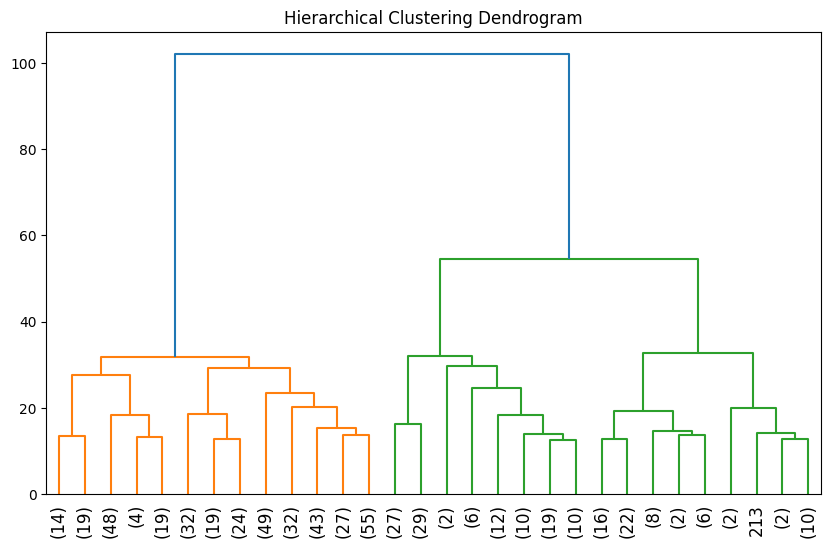

In [ ]:
# VK_20029476
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode="lastp", p=30, leaf_rotation=90., leaf_font_size=12.)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

9.2 K-Means Clustering

In [ ]:
# VK_20029476
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4" 


In [ ]:
# VK_20029476
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [ ]:
# VK_20029476
kmeans_ct = pd.crosstab(kmeans_labels, diagnosis)
print("\nKMeans Clustering vs Diagnosis")
print(kmeans_ct)


KMeans Clustering vs Diagnosis
diagnosis    B    M
row_0              
0          339   36
1           18  176


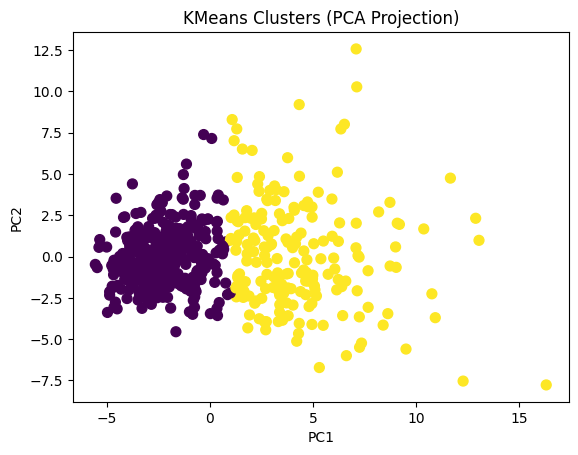

In [ ]:
# VK_20029476
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("KMeans Clusters (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
# VK_20029476 (ARI should be in range from -1 to 1 to understand whether the clustering is done correctly or not)
from sklearn.metrics import adjusted_rand_score

ari_hclust = adjusted_rand_score(diagnosis, hclust_labels)
ari_kmeans = adjusted_rand_score(diagnosis, kmeans_labels)

print("ARI (Hierarchical Clustering):", ari_hclust)
print("ARI (KMeans Clustering):", ari_kmeans)

ARI (Hierarchical Clustering): 0.5750409366326297
ARI (KMeans Clustering): 0.6536246043910179
